In [1]:
#Script para identificar determinantes de citações na base USPTO
#Renato Kogeyama

#09-27-2019
#I am renaming citation as forward citation and backward citation

#09-17-2018

#Alto uso de memoria - rodar no Amazon AWS 

import pandas as pd
# from sklearn.preprocessing import MinMaxScaler #To normalize data

uuid	    unique id	all	varchar(36)

patent_id	patent number	all	varchar(20)

citation_id	identifying number of patent to which select patent cites	all	varchar(20)

date	    date select patent (patent_id) cites patent (citation_id)	all	date

name	    name of cited record	all	varchar(64)

kind	    WIPO document kind codes (http://www.uspto.gov/learning-and-resources/support-centers/electronic-business-center/kind-codes-included-uspto-patent)	2002 and After	varchar(10)

country	    country cited patent was granted (always US)	all	varchar(10)

category	who cited the patent (examiner, applicant, other etc)	2002 and After	varchar(20)

sequence	order in which this reference is cited by select patent	all	int


In [2]:
#ler o arquivo de patentes
asg = pd.read_csv(r'/home/rkogeyam/PATENT_CITATION/uspatentcitation.tsv', sep='\t', lineterminator='\n', na_values='-')

#citation_id eh o campo que indica quais patentes foram citadas. 
#Para checar, basta ver qual veio primeiro (patent_id or citation_id)

#este comando esta aqui para poupar processamento
#caso nao seja necessario, apenas carrega o arquivo ao inves de recalcula-lo
# forward_citation=pd.read_table('patent_citation.csv') 

In [ ]:
forward_citation=asg.groupby(['citation_id']).count() #quantas vezes a patente foi citada no futuro 
backward_citation=asg.groupby(['patent_id']).count() #quantas patentes foram citadas por uma invencao

In [3]:
forward_citation.head()

4683202    3744
5523520    3433
4683195    3219
4733665    2744
5731856    2602
Name: citation_id, dtype: int64

In [4]:
# % matplotlib inline

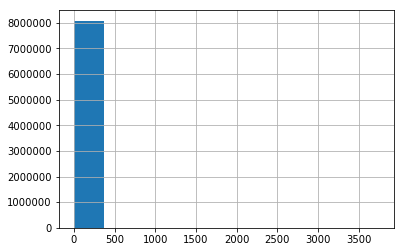

In [5]:
backward_citation.head()

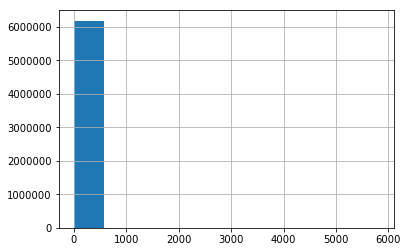

In [6]:
# backward_citation.hist()

In [7]:
# estranho, eu esperava um numero de citacoes maiores
# 2008 Zhong-kai encontra menos ainda, da ordem de 1500
# eu quero usar na verdade forward_citation 

In [8]:
# forward_citation.to_csv('patent_citation.csv')


In [9]:
df = pd.read_csv('patent.csv', sep='\t', error_bad_lines=False, na_values='-', usecols=[0,1,4,5,6,7,8])
#o problema aqui eh que estas linhas tem tags tipo <b><\b>
#poderia limpa-las antes de 

/home/applications/anaconda3/4.2.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# dados desnecessarios
# date ja esta separado por dia, mes e ano, number nada mais eh que o patent_id e filename nao eh usado
# df.drop(columns='number')
# df.drop(columns='filename')

In [11]:
df.sort_values(by=['date'])
# df

,id,type,date,abstract,title,kind,num_claims
0,3930271,utility,1976-01-06,A golf glove is disclosed having an extra fin...,Golf glove,A,4
924,3931195,utility,1976-01-06,The compounds are of the heterocyclic class o...,Substituted piperidines,A,28
923,3931194,utility,1976-01-06,Compounds of the formula ##SPC1## Wherein R i...,"2-Heteroaryl-methyl)-5,9.beta.-dialkyl-6,7-ben...",A,6
922,3931193,utility,1976-01-06,"Quinine, quinidine and analogs thereof, are p...",Quinuclidine derivatives,A,5
921,3931192,utility,1976-01-06,"Quinine, quinidine and analogs thereof, are p...",Process for piperidine intermediates for quini...,A,2
920,3931191,utility,1976-01-06,"A process of converting 2,3,4,5-tetrahydropyr...",Conversion of tetrahydropyrimidines to pyridines,A,5
919,3931190,utility,1976-01-06,A process is provided for the preparation of ...,Preparation of 2-chloropyridine by hydrogenolysis,A,9
918,3931189,utility,1976-01-06,Compounds of the formula ##SPC1## Wherein PA1...,"N-(heteroaryl-methyl)-6,14-(endoethano or endo...",A,6
917,3931188,utility,1976-01-06,Compounds having the formula ##SPC1## In whic...,"3-Hydroxy-5,6-benzomorphinan derivatives",A,9
916,3931187,utility,1976-01-06,Compounds of the formula ##SPC1## Wherein PA1...,"N-(heteroaryl-methyl)-7.alpha.-acyl-6,14-(endo...",A,6


In [12]:
df['date']=pd.to_datetime(df['date'], format="%Y-%m-%d", errors='coerce') #conversao de string para data

In [13]:
# dados desnecessarios
# df.drop(columns=['date'])

# df=df.dropna()
#dropando dados que nao sao importantes no momento
#a coluna country eh toda US. filename nao tem uso agora, e a coluna number eh identica a coluna id.
# df=df.drop(columns=['number', 'filename', 'country']) 

In [14]:
# df.plot.hist()

In [15]:
# #juntando as citacoes a tabela principal
# df=df.set_index('citation_id').join(forward_citation)

# df=df.set_index('citation_id').join(backward_citation)

df=pd.merge(df, how='left', on='id')
df=pd.merge(df, pd.DataFrame(backward_citation, columns = ['id','backward_citation']), how='left', on='id')

In [16]:
#df.sort_values('citation_id').dropna().tail()

In [17]:
df.head()

,id,type,date,abstract,title,kind,num_claims,forward_citation,backward_citation
0,3930271,utility,1976-01-06,A golf glove is disclosed having an extra fin...,Golf glove,A,4,NaN,NaN
1,3930272,utility,1976-01-06,A lock for a height-adjustable crib or plaype...,Crib leg lock,A,3,NaN,NaN
2,3930273,utility,1976-01-06,A bed safety side rail arrangement which incl...,Bed safety side rail arrangement,A,24,NaN,NaN
3,3930274,utility,1976-01-06,The assembly includes a longitudinal axis and...,Assembly for use in recreational activities,A,7,NaN,NaN
4,3930275,utility,1976-01-06,A novel slipper and its method of fabrication...,Method of fabricating a slipper,A,9,NaN,NaN


In [18]:
# df['citation_id']=df['citation_id'].fillna(value=0) #NA eh zero mesmo pq a patente nao recebeu citacoes

In [19]:
df=df.dropna()

In [20]:
#estamos prontos para testar o primeiro modelo 

In [21]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df.head()

,id,type,date,abstract,title,kind,num_claims,forward_citation,backward_citation,year,month,day


In [22]:
# 19-09-26
# este eh o trecho que deve ser alterado
# ao inves de gerar varias dummies, vou categorizar a variavel

# df=pd.get_dummies(df, columns=['type', 'kind'])
# df.describe()

df["type"] = df["type"].astype('category')
df["kind"] = df["kind"].astype('category')


#eh um bom ponto para salvar o arquivo
# df.to_csv('df_w_pat_cit.csv') #versao original

# df.to_csv('df_w_pat_cit_190926.csv') #alteracao de type e kind para categoria, divisao de date em ano, mes e dia

df.to_csv('df_w_pat_cit_190928.csv') #eliminacao de number, filename e country

#comecar a partir dele em um novo notebook